In [1]:
import urllib.request         #for URL linking
import json                   #use for JSON data
import re                     #use it for regularise expression
import nltk
#Extracting Data from the given API

API_Key="9880c74065764563b878fdc36ed607a3" #Use Your personal Key by register yourself on API website 
Search_Topic="entertainment"#write your desied Topic if topic have space then use '+' for space e.g Auto+mobile+inductry

In [2]:
def data_extraction(key,topic):#this function extract data of Title, description and content of required Topic  
   
    title=""
    description=""
    content=""
    response = urllib.request.urlopen('https://newsapi.org/v2/everything?q='+topic+'&pagesize=100&apiKey='+key).read()
    headline = json.loads(response)                # responce of an API in JSON
    for artical in headline["articles"]:
        title += str(artical["title"])             # Store data of title in a string from JSON responce
        description += str(artical["description"]) # Store data of description in a string from JSON responce
        content += str(artical["content"])         # Store data of content in a string from JSON responce
    data_as_str=title+description+content          # store whole data in a string to return 
    return data_as_str

In [3]:
content_as_str=data_extraction(API_Key, Search_Topic)

In [4]:
import re
import sys
!{sys.executable} -m pip install nltk
import nltk
from nltk.corpus import stopwords

In [5]:
def review_to_words(raw_review):
    review_text = content_as_str
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    stops.add("chars")
    meaningful_words = [word for word in words if not word in stops]
    return " ".join(meaningful_words)

In [6]:
clean_review = review_to_words(content_as_str)
clean_review

'netflix pursuing interactive content including maybe rom comthe next frontier real estate technologysports streaming service fubotv expands lineup viacom entertainment channelswarnermedia announces restructuring wake takeovereveryone need know captain marvel recommended reading battle make end game thrones disney first full aladdin trailer shows extended look smith genie glorykarl lagerfeld cat could inherit fortune snl lets twitter decide actors get jobs new game show sketchpublic theater sues ian schrager public hotel alleging trademark violationelton john farewell tour marks beginning audio augmenting wearableunreal engine support coming hololens podcast effectively wild ben lindberghjeffrey katzenberg streaming service quibi show snapchat foundingwarnermedia hires bob greenblatt leadership shuffledisney ducktales reboot features amazing nod classic nes gamethese netflix shows gen z thinks actually represent themlady gaga spike lee oscar nominees face snl family feuddon cheadle sto

In [7]:
from nltk.tokenize import word_tokenize

AI_tokens= word_tokenize(clean_review)

In [8]:
from nltk.probability import FreqDist
fdist= FreqDist()

In [9]:
from nltk.probability import FreqDist
fdist= FreqDist()

In [10]:
for word in AI_tokens:
    fdist[word.lower()]+=1

fdist_top=fdist.most_common()

fdist_top

[('entertainment', 72),
 ('new', 35),
 ('show', 31),
 ('live', 31),
 ('marvel', 28),
 ('game', 28),
 ('first', 28),
 ('news', 28),
 ('one', 28),
 ('time', 24),
 ('season', 21),
 ('night', 21),
 ('announced', 21),
 ('saturday', 20),
 ('see', 20),
 ('like', 19),
 ('look', 18),
 ('best', 17),
 ('last', 17),
 ('movie', 16),
 ('film', 16),
 ('two', 16),
 ('captain', 15),
 ('disney', 15),
 ('back', 15),
 ('star', 15),
 ('thing', 15),
 ('industry', 15),
 ('netflix', 14),
 ('oscars', 14),
 ('r', 14),
 ('series', 14),
 ('get', 13),
 ('kelly', 13),
 ('may', 13),
 ('full', 12),
 ('tv', 12),
 ('video', 12),
 ('part', 12),
 ('camera', 12),
 ('gaming', 12),
 ('today', 12),
 ('make', 11),
 ('host', 11),
 ('read', 11),
 ('nintendo', 11),
 ('weekend', 11),
 ('also', 11),
 ('thrones', 10),
 ('times', 10),
 ('reality', 10),
 ('big', 10),
 ('larson', 10),
 ('awards', 10),
 ('e', 10),
 ('weird', 10),
 ('march', 10),
 ('million', 10),
 ('latest', 10),
 ('lot', 10),
 ('people', 10),
 ('superhero', 10),
 ('tw

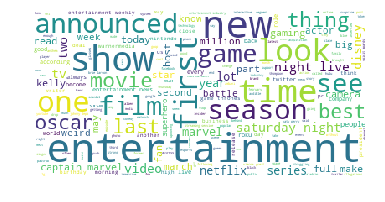

In [12]:
#import sys
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
# importing all necessery modules
#!{sys.executable} -m pip install WordCloud
from wordcloud import WordCloud


cloud = WordCloud(background_color="white").generate(clean_review)
plt.imshow(cloud)
plt.axis('off')
plt.show()